In [71]:
import numpy as np
import json
import matplotlib.pyplot as plt
from numpy import linalg as LA
from numpy import random as rand

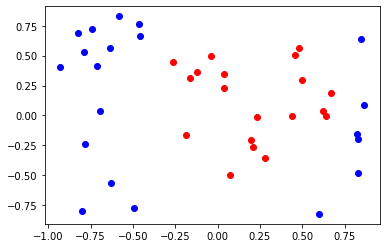

In [76]:
C0 = np.zeros(7)

file_name='D:/ASD/rocks/train_02.json'

with open(file_name, 'r') as jsonfile:
    file = json.load(jsonfile)
    
inside = np.array(file['inside']) # class -1
outside = np.array(file['outside']) # class 1


def plot_(ins,outs):
    R = []
    B = []
    for i in ins:
        R.append(i)
    for o in outs:
        B.append(o)
    R = np.array(R)
    B = np.array(B)
    plt.scatter(R.T[0],R.T[1], c='red')
    plt.scatter(B.T[0],B.T[1], c='blue')
    plt.show()


def x_vector(x1, x2):
    v = np.array([1, x1, x2, x1*x1, x1*x2, x2*x1, x2*x2])
    return v

def Tfunc(x, k):
    x1 = x[0]
    x2 = x[1]
    v = x_vector(x1, x2)
    T = [v, k]
    return T

def class_init(ins, outs):
    T = [] 
    for i in ins:
        T.append(Tfunc(i, -1))
    for o in outs:
        T.append(Tfunc(o, 1))
    return T
    
T = class_init(inside, outside)
plot_(inside,outside)

In [77]:
def eig_vector(C):
    s11,s12,s21,s22 = C[3:7]
    cov = np.array([[s11, s12],
                   [s21, s22]])
    w, v = LA.eig(cov)
    v1 = v[:][0]
    v2 = v[:][1]
    T1 = []
    if (w[0] <= 0):
        T1.append([np.array([0,0,0,v1[0]*v1[0],v1[0]*v1[1],v1[1]*v1[0],v1[1]*v1[1]]),1])
    if (w[1] <= 0):
        T1.append([np.array([0,0,0,v2[0]*v2[0],v2[0]*v2[1],v2[1]*v2[0],v2[1]*v2[1]]),1])
    return T1

def customPerceptron(C, T):
    T.extend(eig_vector(C))
    for t in T:
        ckx = np.dot(t[0], C)*t[1] # ckx
        if ckx<=0:
            C1 = t[0]*t[1]+C
            C = customPerceptron(C1, T)
            break
    return C

In [78]:
R = customPerceptron(C0, T)
print(R)

def eig_vectorr(C):
    s11 = C[3]  
    s12 = C[4]
    s21 = C[5]
    s22 = C[6]
    cov = np.array([[s11, s12],
                   [s21, s22]])
    w = LA.det(cov)
    print(w)
    w, v = LA.eig(cov)
    return w

eig_vectorr(R)

[-1.         -0.62549901 -0.48898386  2.57720745 -0.52184595 -0.52184595
  1.50228859]
3.5993861407721695


array([2.78887139, 1.29062464])

C:\Users\E786~1\AppData\Local\Temp/ipykernel_9552/2041780839.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v = np.array([1, x1, x2, x1*x1, x1*x2, x2*x1, x2*x2])


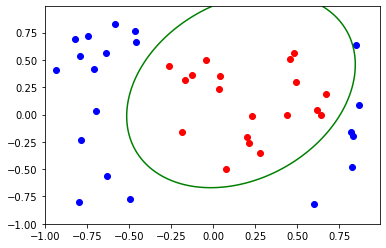

In [79]:
def f(x1,x2,C):
    return np.dot(C,x_vector(x1,x2))


def plot_p(ins,outs,C,lim):
    R = []
    B = []
    for i in ins:
        R.append(i)
    for o in outs:
        B.append(o)
    R = np.array(R)
    B = np.array(B)
    plt.scatter(R.T[0],R.T[1], c='red')
    plt.scatter(B.T[0],B.T[1], c='blue')
    t = np.arange(lim[0],lim[1],0.01)
    U,V = np.meshgrid(t,t)
    Fs = np.array(f(np.ravel(U),np.ravel(V),C))
    F = Fs.reshape(U.shape)
    plt.contour(U,V,F,levels=[0],colors=['green'])
    plt.show()
    

lim = np.array([-1,1])    
plot_p(inside,outside,R,lim)

In [81]:
X1 = rand.normal(0.25,0.2,20)
X2 = rand.normal(0,0.25,20)
X = []
Tx = []
for i in np.arange(len(X1)):
    X.append([X1[i],X2[i]])
    Tx.append([x_vector(X1[i],X2[i]),-1])
print(X)




[[array([1.        , 0.18865441, 0.1008201 , 0.03559049, 0.01902016,
       0.01902016, 0.01016469]), -1], [array([ 1.        , -0.26753099,  0.12150315,  0.07157283, -0.03250586,
       -0.03250586,  0.01476302]), -1], [array([1.00000000e+00, 4.35511077e-01, 1.43425573e-02, 1.89669898e-01,
       6.24634259e-03, 6.24634259e-03, 2.05708951e-04]), -1], [array([ 1.        ,  0.50323702, -0.19433397,  0.2532475 , -0.09779605,
       -0.09779605,  0.03776569]), -1], [array([1.        , 0.44867711, 0.27392777, 0.20131115, 0.12290512,
       0.12290512, 0.07503642]), -1], [array([1.        , 0.6662461 , 0.10164597, 0.44388386, 0.06772123,
       0.06772123, 0.0103319 ]), -1], [array([ 1.        , -0.09719628, -0.06604512,  0.00944712,  0.00641934,
        0.00641934,  0.00436196]), -1], [array([1.00000000e+00, 1.88974951e-01, 1.10921844e-02, 3.57115320e-02,
       2.09614499e-03, 2.09614499e-03, 1.23036554e-04]), -1], [array([1.        , 0.30327483, 0.16361569, 0.09197562, 0.04962052,
      